# 일원배치 분산분석 (one-way ANOVA)

* T-검정과 달리 두 개 이상의 다수 집단 간 평균을 비교하는 통계분석 방법

* 반응값에 대한 하나의 범주형 변수의 영향을 알아보기 위해 사용한다.

* 가정 : 각 집단의 측정치는 **서로 독립적이며, 정규분포를 따른다. 또한 각 집단 측정치의 분산은 같다.**

* 등분산 검정은 : 정규성을 만족할 경우 `Bartlett.test`, 그렇지 않은 경우`Levene.test`(lawstat 패키지)를 사용

* 정규성 가정이 깨졌다면? $\to$ kruskal-Wallis Rank Sum Test

* 정규성 가정이 깨지지 않았다면? ->`F통계량`에 근거한 `p-value` 값으로 가설의 유의성을 검증한다.

* 사후 검정 : 귀무가설이 기각된 경우 어떠한 집단들에 대해서 평균의 차이가 존재하는지를 알아보기 위해 실시하는 분석

## R 실습

In [10]:
by( iris$Sepal.Width,iris$Species,shapiro.test)

iris$Species: setosa

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.97172, p-value = 0.2715

------------------------------------------------------------ 
iris$Species: versicolor

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.97413, p-value = 0.338

------------------------------------------------------------ 
iris$Species: virginica

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.96739, p-value = 0.1809


* 정규성 검정결과 세 가지 종 모두 정규성을 만족한다.

In [18]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [20]:
bartlett.test(Sepal.Width~Species ,data= iris)


	Bartlett test of homogeneity of variances

data:  Sepal.Width by Species
Bartlett's K-squared = 2.0911, df = 2, p-value = 0.3515


* 검정결과 3가지 종의 꽃잎길이는 등분산성을 만족한다.

* 정규성과 등분산성을 만족한다는 가정하에 일원배치 분산분석을 수행

In [30]:
result <- oneway.test(Sepal.Width~Species, data=iris,var.equal=T)
result


	One-way analysis of means

data:  Sepal.Width and Species
F = 49.16, num df = 2, denom df = 147, p-value < 2.2e-16


* 검정결과 귀무가설을 기각 즉, 적어도 어느 하나의 종의 `Speal.Width`가 나머지 종들과 통계적으로 유의한 차이가 있다고 말할 수 있다.

*  사후검정을 통해 확인

In [49]:
library(stats)

In [64]:
pairwise.t.test(iris$Sepal.Width,iris$Species,pool.sd=F,p.adj="bonf") ## pool.sd=F는 합동공분산 사용여부 


	Pairwise comparisons using t tests with non-pooled SD 

data:  iris$Sepal.Width and iris$Species 

           setosa  versicolor
versicolor 7.5e-15 -         
virginica  1.4e-08 0.0055    

P value adjustment method: bonferroni 

* $H_0 : $ 집단들 사이의 평균은 같다.

* $H_1 : $ 집단들 사이의 평균은 같지 않다.

* $p-value$ 값을 살펴본 결과 모든 종들에 대해서 꽃받침 폭의 평균값은 통계적으로 유의한 차이가 있다는 것을 알 수 있다.

***

# 이원배치 분산분석 (Two-way ANOVA)

* 분산분석에서 반응값에 대해 두 개의 범주형 변수 $A,\,B$의 영향을 알아보기 위해 사용되는 검증 방법이다.

* 두 독립변수 A, B 사이에 상관관계가 있는지를 살펴보는 **교호작용(두 독립변수의 범주들의 조합으로 인해 반응변수에 미치는 특별한 영향)** 에 대한 검증이 반드시 진행되어야 한다.

* 가정 각 집단 측정치는 정규성을 따르며, 집단 간 측정치의 분산은 같다.

## R 실습

* 실린더 개수와 변속기 종류에 따른 주행거리의 차이가 있는지 검정

In [99]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [100]:
mtcars$cyl <- as.factor(mtcars$cyl)
mtcars$am <- as.factor(mtcars$am)

In [101]:
library(tidyverse)

In [87]:
#mtcars %>% 
 #       group_by(cyl,am) %>% 
  #          summarise(statistic = shapiro.test(mpg)$statistic,
  #                    p.value = shapiro.test(mpg)$p.value) 

* 본래는 위와 같이 검정을 하여야 하나 샘플사이즈가 3보다 적은 그룹이 있어 계산 불가...

In [102]:
car_aov <- aov(mpg~cyl*am,mtcars)

In [103]:
summary(car_aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
cyl          2  824.8   412.4  44.852 3.73e-09 ***
am           1   36.8    36.8   3.999   0.0561 .  
cyl:am       2   25.4    12.7   1.383   0.2686    
Residuals   26  239.1     9.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

* 검정결과 **실린더개수(cyl)** 에 따른 주행거리 차이만 통계적으로 유의하다는 결론을 내렸다.

In [105]:
options(repr.plot.res=200,repr.plot.height=5,repr.plot.width=10)

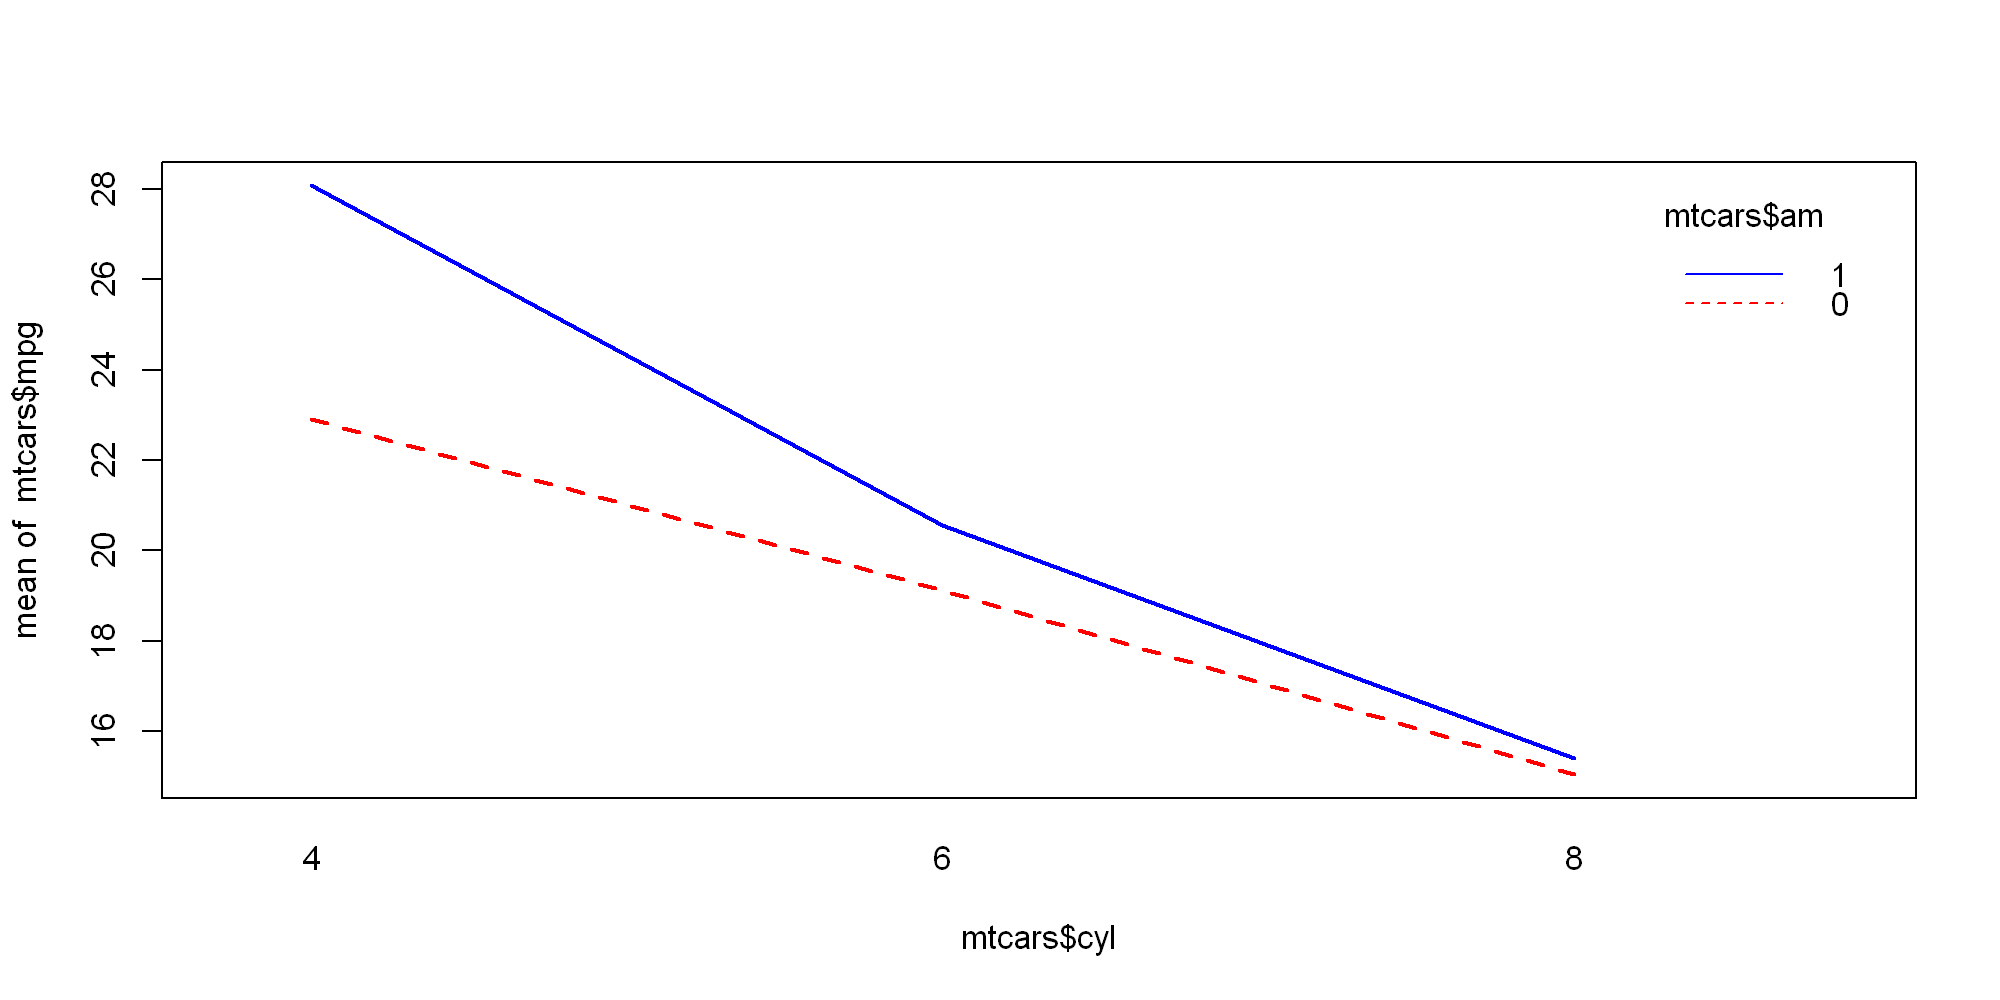

In [106]:
interaction.plot(mtcars$cyl,mtcars$am,mtcars$mpg,col=c("red","blue"),lwd=2)

* 일반적으로 상호작용 그래프에서 두 선이 서로 교차하고 있을 시에는 $x$ 축에 있는 독립변수와 그래프에서 시각화된 독립변수 간에는 상호작용이 존재한다고 해석할 수 있다.